# Campus Recruitment Prediction

## Import Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
import seaborn as sns

## Assignment Tasks

### Data Preprocessing and Exploratory Data Analysis (EDA)

In [79]:
filename = '/Users/macbookpro/Downloads/Placement_Data_Full_Class.csv'
df = pd.read_csv(filename)
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [81]:
# Missing values that i found
print(df.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [82]:
# Handling With Mean of Salary
df['salary'] = df['salary'].fillna(df['salary'].mean())
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  \
0     Sci&Tech     No     55.0         Mkt&HR  58.80   

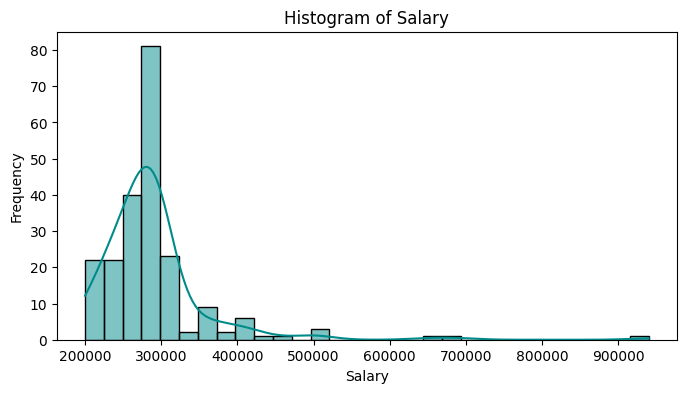

In [83]:
# Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['salary'], bins=30, kde=True , color='darkcyan')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [84]:
# Detect Outliers (remove or we can treat(but not here))

def findouttliersIQR(full_data):
    outliers = pd.DataFrame()
    for col in full_data.select_dtypes(include='number').columns:
        q1 = full_data[col].quantile(0.25)
        q3 = full_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outlier_mask = (full_data[col] < lower_bound) | (full_data[col] > upper_bound)
        outliers[col] = full_data[col][outlier_mask]
    return outliers

print(findouttliersIQR(df))

def drop_outliers_IQR(full_data):
    for col in full_data.select_dtypes(include='number').columns:
        q1 = full_data[col].quantile(0.25)
        q3 = full_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        full_data = full_data[(full_data[col] >= lower_bound) & (full_data[col] <= upper_bound)]
    return full_data

df = drop_outliers_IQR(df)
print(df)

     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p    salary
24     NaN    NaN  97.70       NaN      NaN    NaN  360000.0
42     NaN    NaN  39.00       NaN      NaN    NaN       NaN
49     NaN    NaN  37.00       NaN      NaN    NaN       NaN
120    NaN    NaN  40.00       NaN      NaN    NaN       NaN
134    NaN    NaN  92.00       NaN      NaN    NaN       NaN
169    NaN    NaN  42.16       NaN      NaN    NaN       NaN
177    NaN    NaN  97.00       NaN      NaN    NaN  650000.0
206    NaN    NaN  42.00       NaN      NaN    NaN       NaN
     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
5        6      M  55.00   Others  49.80   Others   Science     67.25   
..     ...   

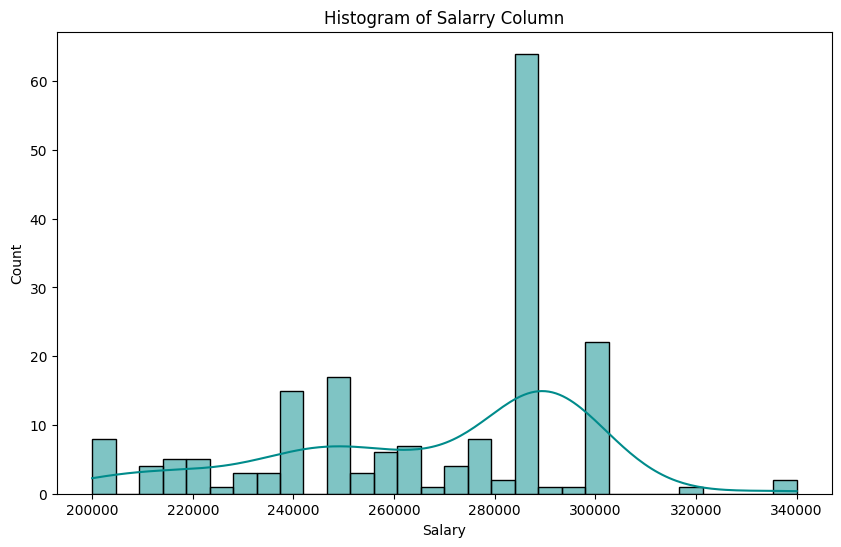

In [85]:
# Distribution After Remove it

plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=30, kde=True, color='darkcyan')
plt.title('Histogram of Salarry Column')
plt.xlabel('Salary')
plt.show()

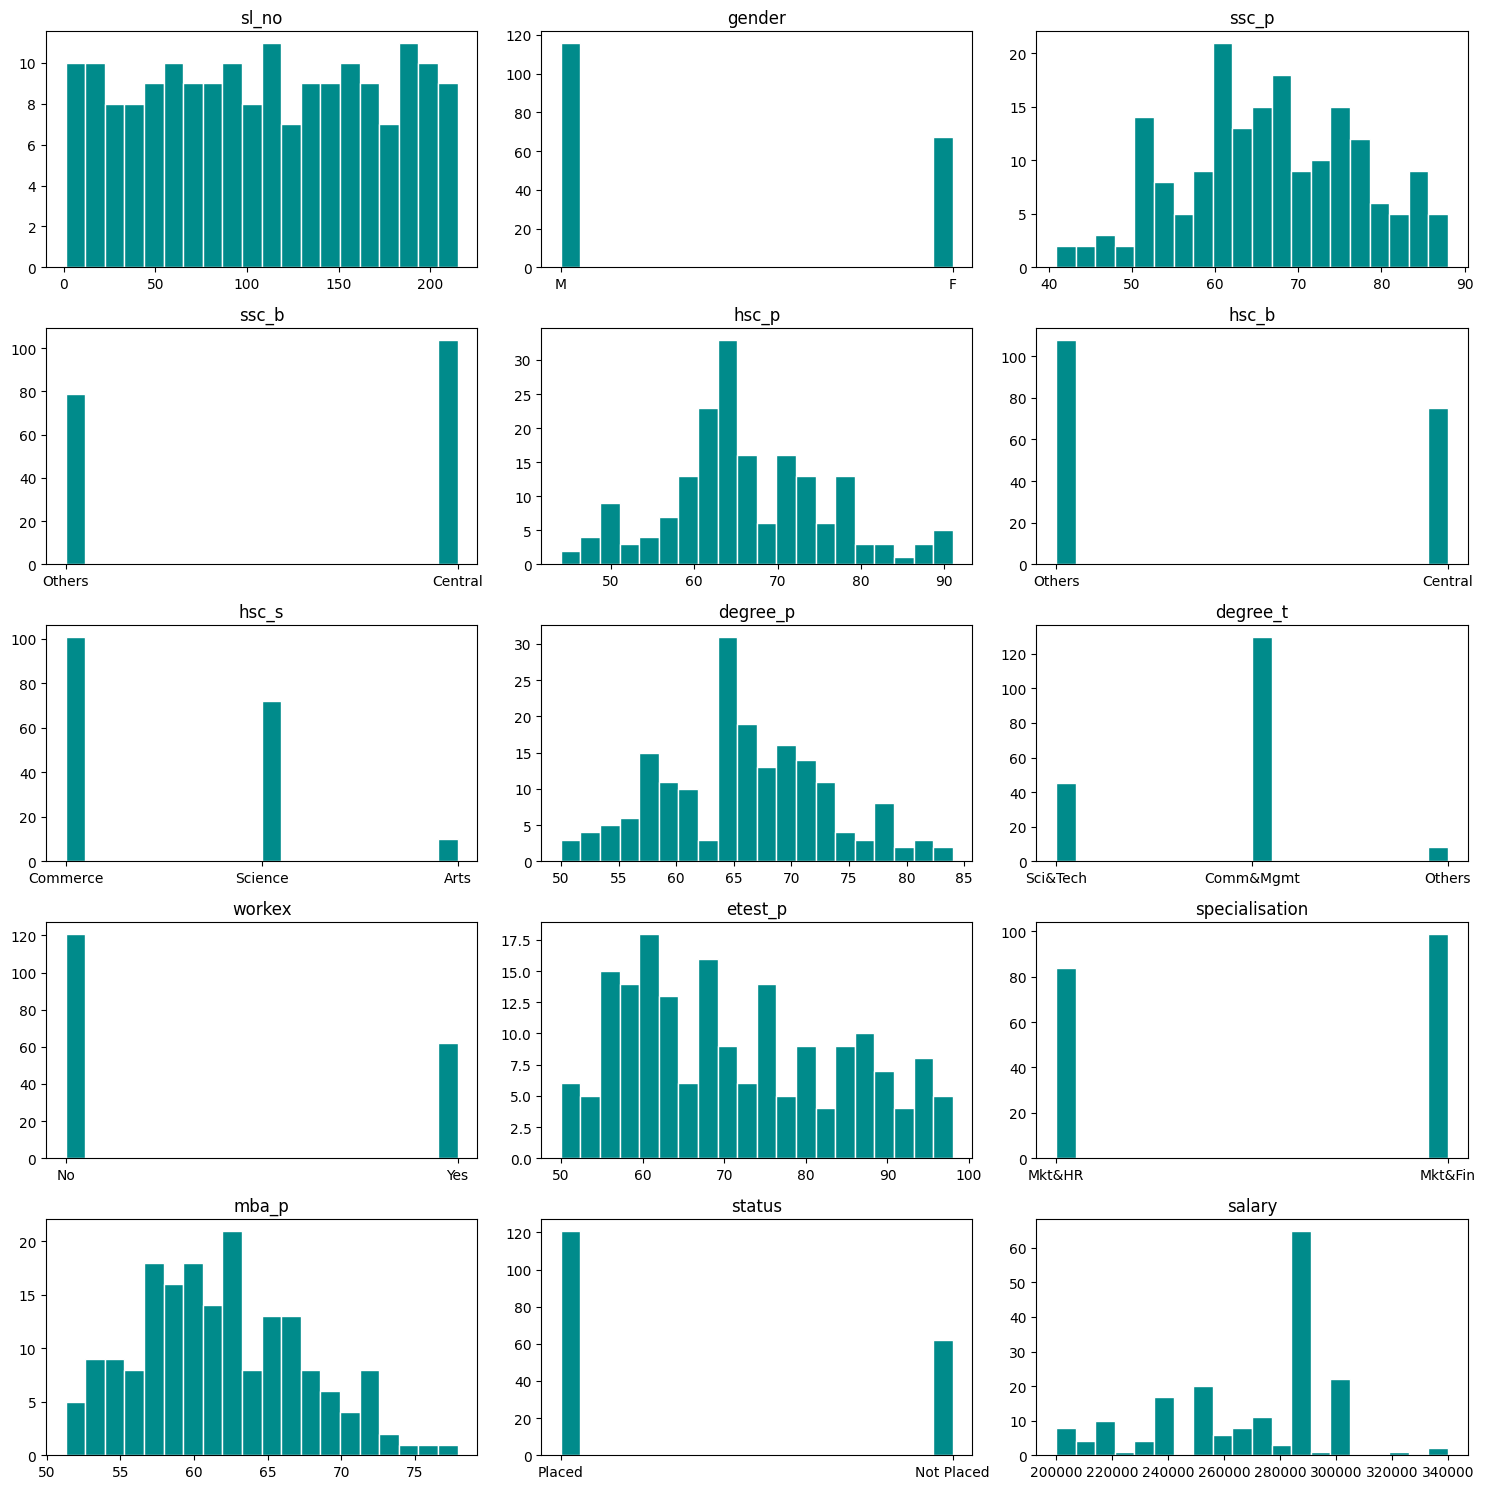

In [86]:
# Distribution for numerical datases
cols_1 = len(df.columns)
rows_1 = int(np.ceil(cols_1 / 3))
fig, axs = plt.subplots(rows_1, 3, figsize=(15, rows_1 * 3))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=20, edgecolor="white" , color='darkcyan')
    axs[i].set_title(col)

for j in range(i + 1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

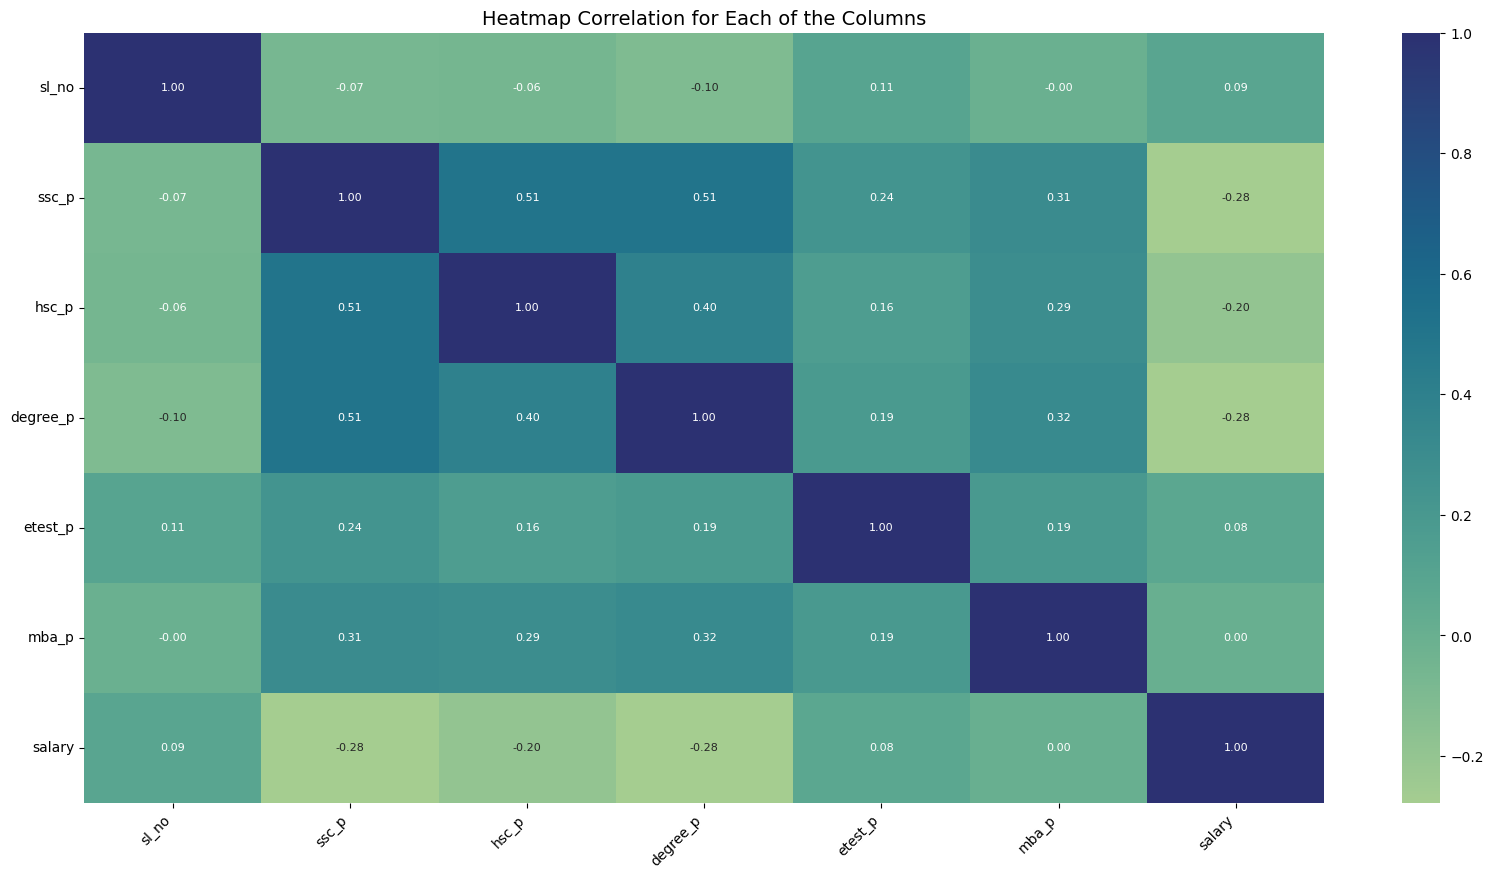

In [87]:
# [Heatmap] --> Correlation For Each Column
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Heatmap Correlation for Each of the Columns", fontsize=14)
plt.show()

In [88]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,108.147541,66.561913,66.257322,65.906011,71.113005,61.824262,267970.683799
std,62.619074,10.551002,9.664616,7.097093,12.967801,5.591580,30195.141940
min,1.000000,40.890000,44.000000,50.000000,50.000000,51.290000,200000.000000
25%,55.500000,60.000000,61.000000,61.000000,60.000000,57.620000,250000.000000
50%,108.000000,66.500000,64.890000,66.000000,68.710000,61.290000,280000.000000
75%,161.500000,74.000000,72.650000,70.835000,82.000000,65.660000,288655.405405
max,215.000000,88.000000,91.000000,84.000000,98.000000,77.890000,340000.000000


In [89]:
categor = df.select_dtypes(include=['object']).columns
for col in categor:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: gender
gender
M    116
F     67
Name: count, dtype: int64

Column: ssc_b
ssc_b
Central    104
Others      79
Name: count, dtype: int64

Column: hsc_b
hsc_b
Others     108
Central     75
Name: count, dtype: int64

Column: hsc_s
hsc_s
Commerce    101
Science      72
Arts         10
Name: count, dtype: int64

Column: degree_t
degree_t
Comm&Mgmt    130
Sci&Tech      45
Others         8
Name: count, dtype: int64

Column: workex
workex
No     121
Yes     62
Name: count, dtype: int64

Column: specialisation
specialisation
Mkt&Fin    99
Mkt&HR     84
Name: count, dtype: int64

Column: status
status
Placed        121
Not Placed     62
Name: count, dtype: int64


In [90]:
# Encode Categorical(not in my usage perpose)
endcode = df.copy()
endcode.drop(columns=['sl_no'], inplace=True)

binarry = ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']
le = LabelEncoder()
for col in binarry:
    endcode[col] = le.fit_transform(endcode[col])
    
endcode = pd.get_dummies(endcode, columns=['hsc_s', 'degree_t'], drop_first=True)
print(endcode)

     gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  \
0         1  67.00      1  91.00      1     58.00       0     55.0   
1         1  79.33      0  78.33      1     77.48       1     86.5   
2         1  65.00      0  68.00      0     64.00       0     75.0   
3         1  56.00      0  52.00      0     52.00       0     66.0   
5         1  55.00      1  49.80      1     67.25       1     55.0   
..      ...    ...    ...    ...    ...       ...     ...      ...   
209       1  62.00      0  72.00      0     65.00       0     67.0   
211       1  58.00      1  60.00      1     72.00       0     74.0   
212       1  67.00      1  67.00      1     73.00       1     59.0   
213       0  74.00      1  66.00      1     58.00       0     70.0   
214       1  62.00      0  58.00      1     53.00       0     89.0   

     specialisation  mba_p  status         salary  hsc_s_Commerce  \
0                 1  58.80       1  270000.000000            True   
1                 0  

## Model Development and Evaluation

In [91]:
df_class = df.copy()
df_class = df_class.drop(columns=['sl_no', 'salary']) 
df_class.dropna(inplace=True) 

df_class['status'] = LabelEncoder().fit_transform(df_class['status']) 

binarry = ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation']
class_multi = ['hsc_s', 'degree_t']

label_encoders = {}
for col in binarry:
    le = LabelEncoder()
    df_class[col] = le.fit_transform(df_class[col])
    label_encoders[col] = le  

df_class = pd.get_dummies(df_class, columns=class_multi, drop_first=True)

X = df_class.drop('status', axis=1)
y = df_class['status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train,X_test)

[[ 0.74376844 -1.49333476  1.16397539 ...  1.32465731 -0.20701967
   1.92605229]
 [ 0.74376844  1.75602741 -0.85912469 ... -0.75491223 -0.20701967
  -0.5191967 ]
 [ 0.74376844 -0.38776767  1.16397539 ... -0.75491223 -0.20701967
  -0.5191967 ]
 ...
 [ 0.74376844 -0.99080426 -0.85912469 ...  1.32465731 -0.20701967
   1.92605229]
 [ 0.74376844 -0.08624938 -0.85912469 ... -0.75491223 -0.20701967
  -0.5191967 ]
 [-1.34450448  0.61729331  1.16397539 ...  1.32465731 -0.20701967
  -0.5191967 ]] [[ 0.74376844  0.11476282  1.16397539 -0.54725846 -1.24956133  0.93284029
  -0.71074232  0.09377017 -0.89580642 -0.13112393 -1.197219    1.32465731
  -0.20701967 -0.5191967 ]
 [-1.34450448 -2.29738354 -0.85912469 -0.64595738  0.80028085 -0.07657534
  -0.71074232  1.67691464  1.11631261  0.20560338 -1.197219    1.32465731
  -0.20701967 -0.5191967 ]
 [ 0.74376844 -1.19181646 -0.85912469  1.52541883  0.80028085 -0.3649798
  -0.71074232 -1.59205647 -0.89580642 -0.40262134  0.83526907 -0.75491223
  -0.207019

In [ ]:
# First one to analyisis
def ans_model(name, model, X_train, X_test, y_train, y_test):
    print(name)
    model.fit(X_train, y_train)

    for X, y, label in [(X_train, y_train, "Train"), (X_test, y_test, "Test")]:
        y_pred = model.predict(X)
        y_proba = model.predict_proba(X)[:, 1]

        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred)
        rec = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc = roc_auc_score(y, y_proba)

        print(f"\n {label} Metrics:")
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1-Score:  {f1:.4f}")
        print(f"ROC-AUC:   {roc:.4f}")
        print()

        # confusion matrix
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
        plt.title(f"{name} - Confusion Matrix ({label})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        print()
        fpr, tpr, _ = roc_curve(y, y_proba)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc:.2f})", color='darkcyan')
        print()

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
    print()

    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label=name, color='darkcyan')
    plt.title(f"{name} - Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()
    print()

Logistic Regression

 Train Metrics:
Accuracy:  0.9178
Precision: 0.9293
Recall:    0.9485
F1-Score:  0.9388
ROC-AUC:   0.9689



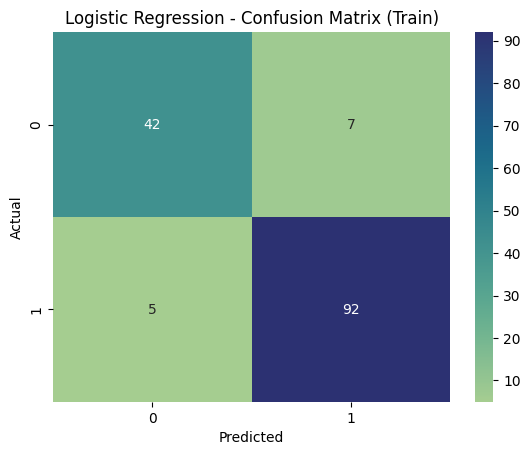




 Test Metrics:
Accuracy:  0.8108
Precision: 0.8148
Recall:    0.9167
F1-Score:  0.8627
ROC-AUC:   0.9103



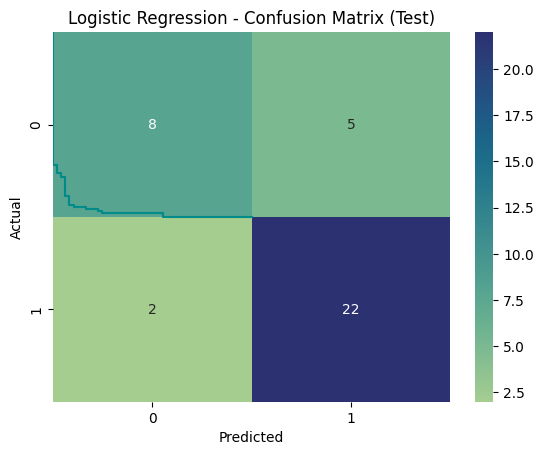

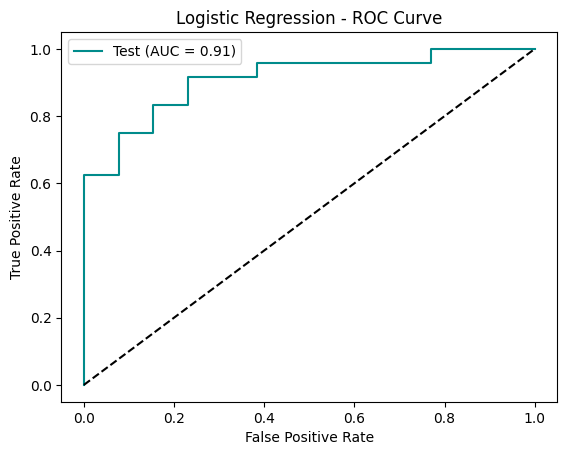

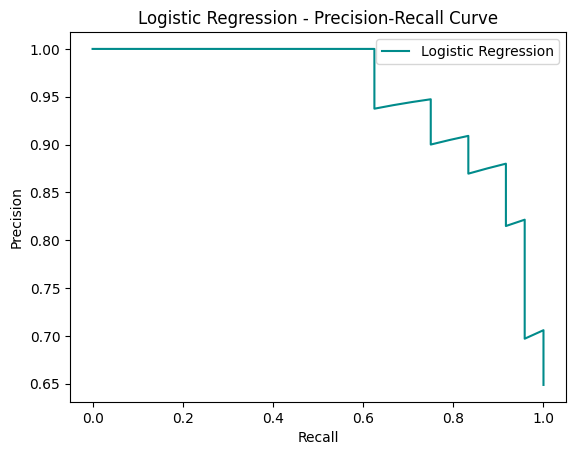

In [93]:
ans_model('Logistic Regression', LogisticRegression(), X_train, X_test, y_train, y_test)

NB

 Train Metrics:
Accuracy:  0.8288
Precision: 0.8600
Recall:    0.8866
F1-Score:  0.8731
ROC-AUC:   0.9100



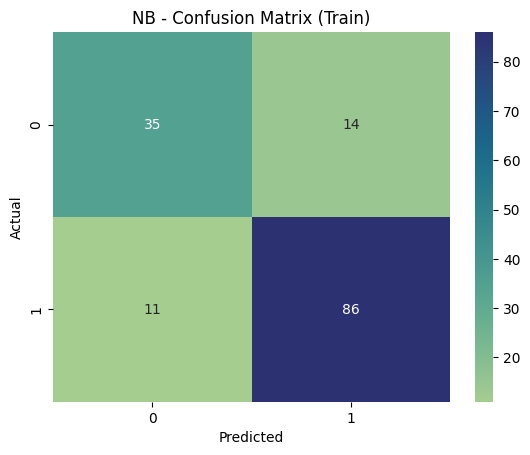




 Test Metrics:
Accuracy:  0.7568
Precision: 0.7778
Recall:    0.8750
F1-Score:  0.8235
ROC-AUC:   0.8622



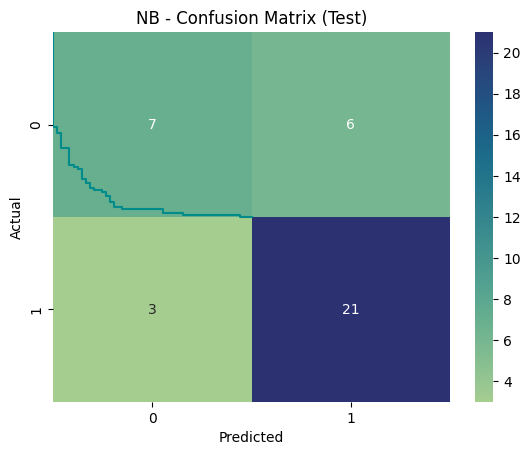

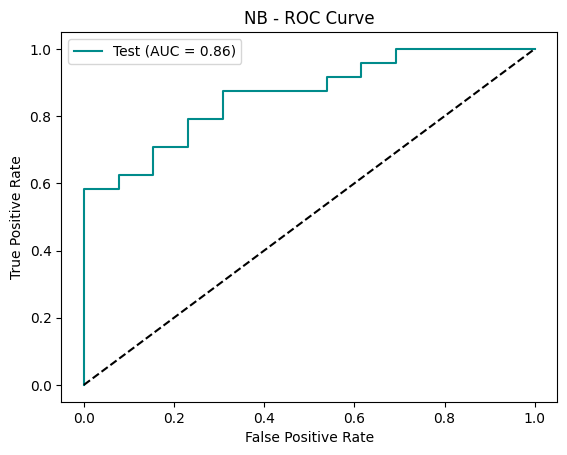

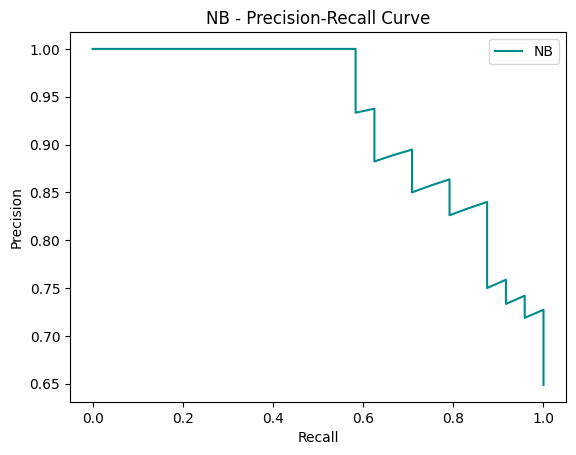

In [94]:
ans_model('NB', GaussianNB(), X_train, X_test, y_train, y_test)

LDA

 Train Metrics:
Accuracy:  0.9247
Precision: 0.9388
Recall:    0.9485
F1-Score:  0.9436
ROC-AUC:   0.9644



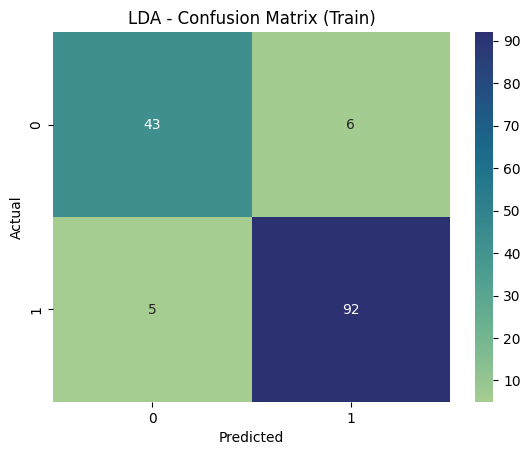




 Test Metrics:
Accuracy:  0.8649
Precision: 0.8519
Recall:    0.9583
F1-Score:  0.9020
ROC-AUC:   0.9199



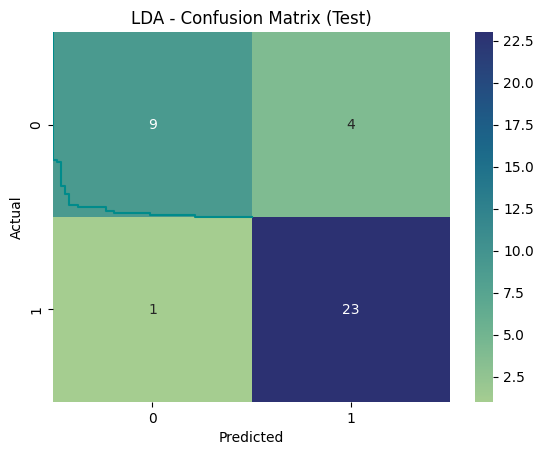

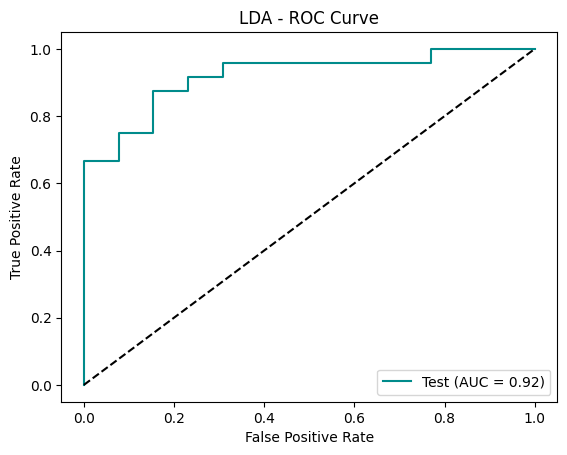

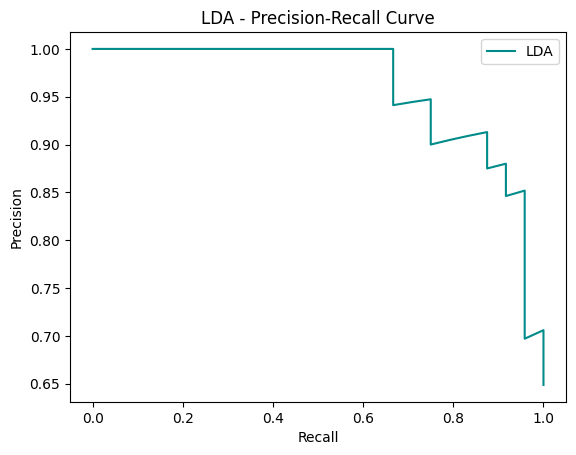

In [95]:
ans_model('LDA', LinearDiscriminantAnalysis(), X_train, X_test, y_train, y_test)

In [96]:
res = DummyClassifier(strategy="most_frequent")
res.fit(X_train, y_train)
print(classification_report(y_test, res.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.65      1.00      0.79        24

    accuracy                           0.65        37
   macro avg       0.32      0.50      0.39        37
weighted avg       0.42      0.65      0.51        37



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [97]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

status
1    0.664384
0    0.335616
Name: proportion, dtype: float64
status
1    0.648649
0    0.351351
Name: proportion, dtype: float64


### Performance Enhancement

In [ ]:
# Second one to analyisis
def ans_model_2(name, model, X_train, X_test, y_train, y_test):
    print(name)
    model.fit(X_train, y_train)

    for X, y, label in [(X_train, y_train, "Train"), (X_test, y_test, "Test")]:
        y_pred = model.predict(X)
        y_proba = model.predict_proba(X)[:, 1]

        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred)
        rec = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc = roc_auc_score(y, y_proba)

        print(f"\n{label} Metrics:")
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1-Score:  {f1:.4f}")
        print(f"ROC-AUC:   {roc:.4f}")
        print()
        # Confusion matrix
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
        plt.title(f"{name} - Confusion Matrix ({label})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        print()
        fpr, tpr, _ = roc_curve(y, y_proba)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc:.2f})" , color="darkcyan")
        print()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
    print()
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label=name, color="darkcyan")
    plt.title(f"{name} - Precision Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()
    print()
logreg_l2 = LogisticRegressionCV(
    Cs=10,
    cv=5,
    penalty='l2',
    scoring='roc_auc',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

logreg_l1 = LogisticRegressionCV(
    Cs=10,
    cv=5,
    penalty='l1',
    scoring='roc_auc',
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)


Logistic Regression (Ridge/L2)

Train Metrics:
Accuracy:  0.9178
Precision: 0.9570
Recall:    0.9175
F1-Score:  0.9368
ROC-AUC:   0.9687



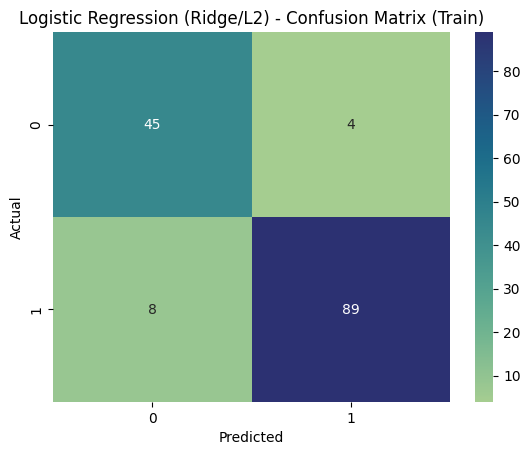




Test Metrics:
Accuracy:  0.8378
Precision: 0.8750
Recall:    0.8750
F1-Score:  0.8750
ROC-AUC:   0.9199



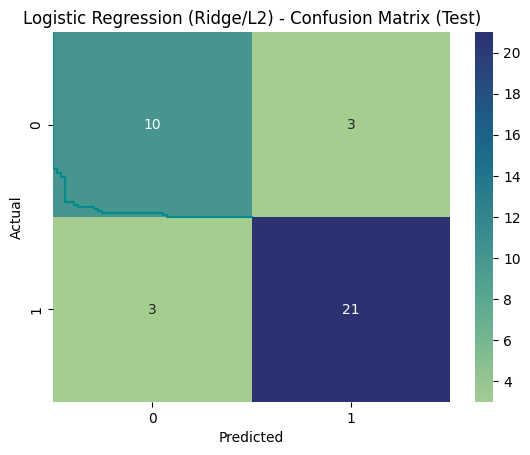

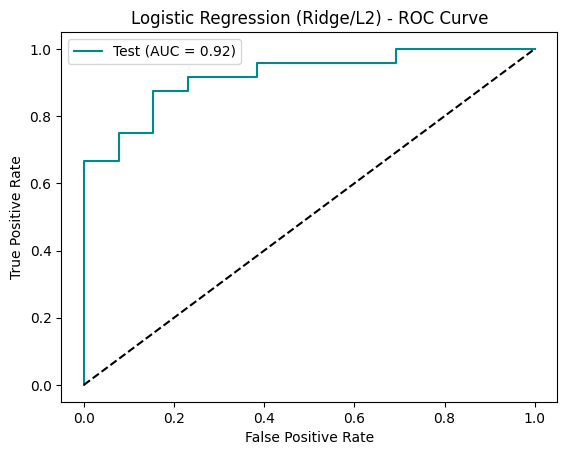

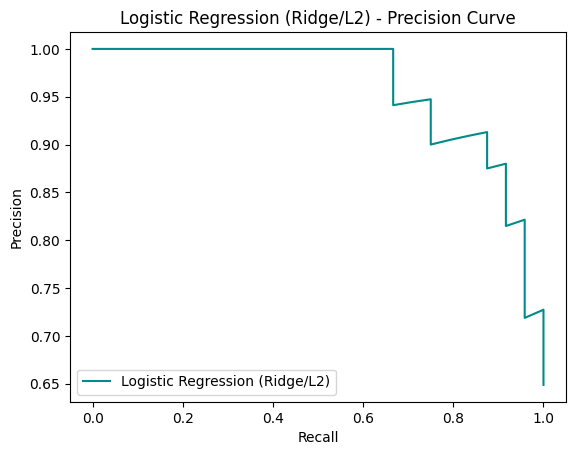

In [99]:
ans_model_2("Logistic Regression (Ridge/L2)", logreg_l2, X_train, X_test, y_train, y_test)

Logistic Regression (Lasso/L1)

Train Metrics:
Accuracy:  0.9247
Precision: 0.9574
Recall:    0.9278
F1-Score:  0.9424
ROC-AUC:   0.9708



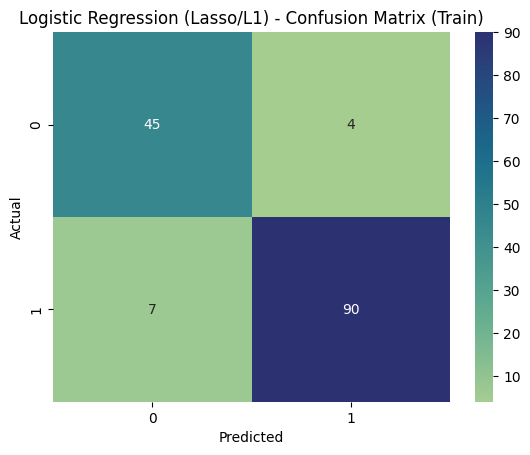




Test Metrics:
Accuracy:  0.8108
Precision: 0.8696
Recall:    0.8333
F1-Score:  0.8511
ROC-AUC:   0.9103



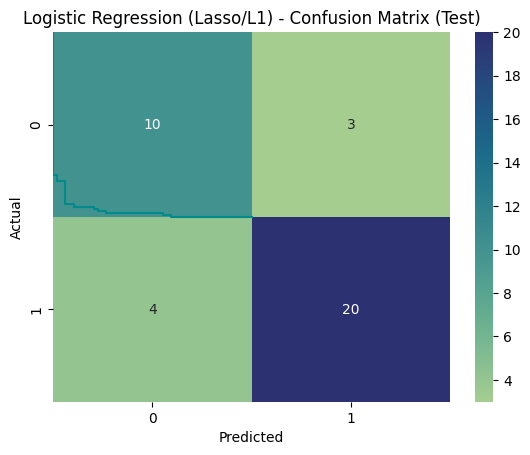

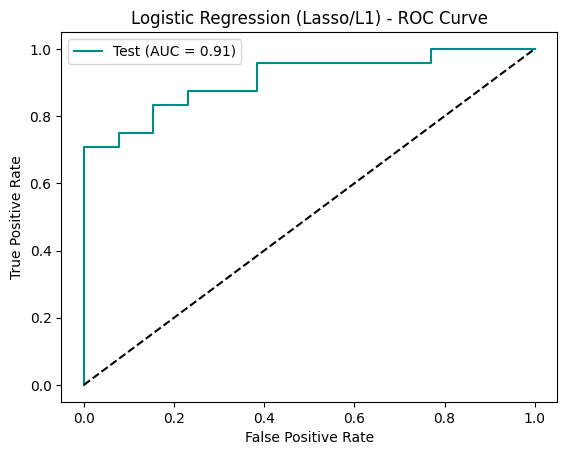

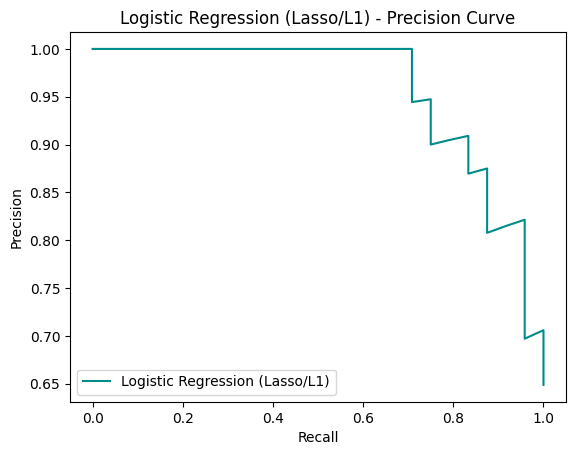

In [100]:
ans_model_2("Logistic Regression (Lasso/L1)", logreg_l1, X_train, X_test, y_train, y_test)
